# Tensorflow Framework for Multi-class Text Classification

## BBC News Classification - 5 Class Problem

* Consists of 2225 documents from the BBC news website corresponding to stories in five topical areas from 2004-2005.
* Class Labels: 5 <br/>

    0 - Business <br/>
    1 - Sport <br/>
    2 - Politics <br/> 
    3 - Tech <br/>
    4 - Entertainment 

## Reading Data

In [1]:
import sys
import numpy as np
import pandas as pd

sys.path.append("..")
pd.set_option('display.max_colwidth', -1)

In [2]:
df_train = pd.read_csv('../datasets/bbcfull/train.csv')
df_test = pd.read_csv('../datasets/bbcfull/test.csv')
df_score = pd.read_csv('../datasets/bbcfull/test_with_label.csv')
df_val = pd.read_csv('../datasets/bbcfull/dev.csv')
df_train.shape, df_test.shape, df_val.shape

((1424, 3), (445, 2), (356, 3))

In [3]:
df_train.label.value_counts()

1    327
0    326
2    267
3    257
4    247
Name: label, dtype: int64

In [4]:
df_val.label.value_counts()

1    82
0    82
2    66
3    64
4    62
Name: label, dtype: int64

In [5]:
df_score.label.value_counts()

1    102
0    102
2    84 
3    80 
4    77 
Name: label, dtype: int64

## Training Bert/Electra classifier with FrameWork

In [6]:
from classitransformers.report import metrics
from classitransformers.configs import Configs

from classitransformers.tfelectra import ElectraClassification #(for using Electra)

#from classitransformers.tfbert import BertClassification

## Set Configurations

* Pre-trained folderpath
* labels list
* train, test and eval batch size
* max_seq_len - how long is the each text input sentence !!
* data_dir - data path folder (optional)
* output_dir - output path folder (optional)

In [7]:
# config = Configs(pretrained_model_dir = '../models/Bert_base',
#                  model_name = 'bert'
#                  num_train_epochs = 3,
#                  train_batch_size = 16, 
#                  eval_batch_size = 8, 
#                  predict_batch_size = 8, 
#                  do_train = True, 
#                  do_eval = True, 
#                  label_list = ["0", "1", "2", "3", "4"], 
#                  max_seq_length = 256, 
#                  data_dir='../datasets/bbcfull/',
#                  output_dir = '../bert_output_bbcfull/')


#model = BertClassification(config)


config = Configs(pretrained_model_dir = '../models/Electra_base/',
              model_name = 'electra',
              num_train_epochs=3, 
              train_batch_size = 16,
              eval_batch_size = 8, 
              do_train = True, 
              do_eval = True, 
              label_list = ["0", "1", "2", "3", "4"],
              max_seq_length = 256,
              data_dir = "../datasets/bbcfull/", 
              output_dir = "../electra_output_bbcfull/")

model = ElectraClassification(config) 

Config: model=electra, trial 1/1
data_dir ../datasets/bbcfull/
do_eval True
do_lower_case True
do_predict False
do_train True
embedding_size None
eval_batch_size 8
gcp_project None
init_checkpoint ../models/Electra_base/
iterations_per_loop 1000
keep_all_models True
label_list ['0', '1', '2', '3', '4']
layerwise_lr_decay 0.8
learning_rate 5e-05
log_examples False
master None
max_seq_length 256
model_hparam_overrides {}
model_name electra
model_size base
num_tpu_cores 1
num_train_epochs 3
num_trials 1
output_dir ../electra_output_bbcfull/
predict_batch_size 8
pretrained_model_dir ../models/Electra_base/
save_checkpoints_steps 1000000
task_names ['textclassification']
tasks {'textclassification': {'type': 'classification', 'labels': ['0', '1', '2', '3', '4'], 'header': True, 'text_column': 1, 'label_column': 2}}
tpu_job_name None
tpu_name None
tpu_zone None
train_batch_size 16
use_tfrecords_if_existing False
use_tpu False
vocab_file ../models/Electra_base/vocab.txt
vocab_size 30522
warmu

## Train Method

In [8]:
model.train()

Start training
Training for 267 steps
Building model...
Building complete
10/267 = 3.7%, SPS: 0.3, ELAP: 32, ETA: 13:30 - loss: 24.9692
20/267 = 7.5%, SPS: 0.4, ELAP: 49, ETA: 10:00 - loss: 22.0914
30/267 = 11.2%, SPS: 0.5, ELAP: 1:06, ETA: 8:38 - loss: 10.4456
40/267 = 15.0%, SPS: 0.5, ELAP: 1:23, ETA: 7:49 - loss: 4.9485
50/267 = 18.7%, SPS: 0.5, ELAP: 1:40, ETA: 7:13 - loss: 11.9883
60/267 = 22.5%, SPS: 0.5, ELAP: 1:57, ETA: 6:44 - loss: 1.3170
70/267 = 26.2%, SPS: 0.5, ELAP: 2:14, ETA: 6:17 - loss: 3.1973
80/267 = 30.0%, SPS: 0.5, ELAP: 2:31, ETA: 5:54 - loss: 0.4818
90/267 = 33.7%, SPS: 0.5, ELAP: 2:48, ETA: 5:31 - loss: 4.8838
100/267 = 37.5%, SPS: 0.5, ELAP: 3:05, ETA: 5:10 - loss: 0.1226
110/267 = 41.2%, SPS: 0.5, ELAP: 3:22, ETA: 4:49 - loss: 13.2960
120/267 = 44.9%, SPS: 0.5, ELAP: 3:40, ETA: 4:29 - loss: 5.2097
130/267 = 48.7%, SPS: 0.5, ELAP: 3:57, ETA: 4:09 - loss: 1.4426
140/267 = 52.4%, SPS: 0.6, ELAP: 4:14, ETA: 3:50 - loss: 0.0053
150/267 = 56.2%, SPS: 0.6, ELAP: 4:31,

## Test Methods

In [9]:
prediction = model.test()

Writing out predictions for [Task(textclassification)] test
Loading dataset textclassification_test
Existing tfrecords not found so creating
Writing example 0 of 445
Building model...
Building complete
Getting predictions for 445 textclassification examples (test)


**Testing a sentence, takes a list of sentences.**

In [10]:
model.text_inference(['He is very good in writing a book on financial investment money making strategy. There are some transactional charges but the profit we make is awesome. The business people are exchanging bulk money over trades happening every seconds. Even retailers are happy doing trade and adding sum to their investments.'])

Writing out predictions for [Task(textclassification)] infer
Loading dataset textclassification_infer
Existing tfrecords not found so creating
Writing example 0 of 1
Building model...
Building complete
Getting predictions for 1 textclassification examples (infer)


[array([0.81033325, 0.03606391, 0.0256805 , 0.99965596, 0.10343838],
       dtype=float32)]

## Export the checkpoint model to pb (protobuf) format

**In TensorFlow, the protbuf file contains the graph definition as well as the weights of the model. Thus, a pb file is all you need to be able to run a given trained model.**

Only support of Bert for now

In [11]:
# Currently does not have support for Electra

#model.export_model()

## Inferencing from Trained Pb Model

* This tensorflow format is used for deployment purpose.

In [12]:
# Not supported for Electra

# predictions = model.inference(test_filename = '../datasets/bbcfull/test.csv', batch_size = 256)

In [13]:
y_pred = [np.argmax(tup) for tup in prediction]
y = df_score.label

## Accuracy and Report



Accuracy: 0.975
Precision: 0.975
Recall: 0.975
F1-Score: 0.975


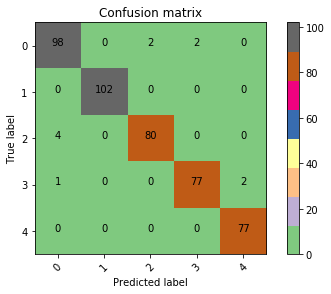

In [14]:
metrics(y, y_pred)